In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import statsmodels.api as sm
#from statsmodels.api import add_constant
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
from matplotlib.pyplot import scatter, xlabel, ylabel, savefig
% matplotlib inline

C:\Users\Asiya\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_oring = pd.read_csv('oring.csv', header=None)
df_oring.head(5)

,0,1,2,3,4
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


In [3]:
df_oring.columns = ["TotalO-Rings", "NumDistressed", "LaunchTemp", "PSI", "Flight #"]

In [4]:
df_oring.head(5)

,TotalO-Rings,NumDistressed,LaunchTemp,PSI,Flight #
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


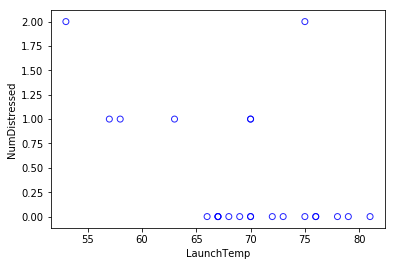

In [5]:
scatter( df_oring.LaunchTemp, df_oring.NumDistressed,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=0.85 )
xlabel('LaunchTemp')
ylabel('NumDistressed')
savefig('DistressedOrings_v_Launch.png', fmt='png', dpi=100)

In [8]:
df_oring['Eins'] = np.ones(( len(df_oring), ))

x = df_oring[['LaunchTemp', 'PSI']]
y = df_oring.NumDistressed
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          NumDistressed   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     5.490
Date:                Fri, 06 Apr 2018   Prob (F-statistic):             0.0126
Time:                        11:52:26   Log-Likelihood:                -17.408
No. Observations:                  23   AIC:                             40.82
Df Residuals:                      20   BIC:                             44.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3298      1.188      2.803      0.0

In [21]:
ring_distress0 = 3.3298 - 31 * 0.0487 + 0 * 0.0029
print ("The number of O-rings predicted to be in distress at 31F and 0 PSI is ", ring_distress0)
ring_distress50 = 3.3298 - 31 * 0.0487 + 50 * 0.0029
print ("The number of O-rings predicted to be in distress at 31F and 50 PSI is ", ring_distress50)
ring_distress100 = 3.3298 - 31 * 0.0487 + 100 * 0.0029
print ("The number of O-rings predicted to be in distress at 31F and 100 PSI is ", ring_distress100)
ring_distress200 = 3.3298 - 31 * 0.0487 + 200 * 0.0029
print ("The number of O-rings predicted to be in distress at 31F and 200 PSI is ",  ring_distress200)

The number of O-rings predicted to be in distress at 31F and 0 PSI is  1.8201
The number of O-rings predicted to be in distress at 31F and 50 PSI is  1.9651
The number of O-rings predicted to be in distress at 31F and 100 PSI is  2.1101
The number of O-rings predicted to be in distress at 31F and 200 PSI is  2.4001
